***
***

<h1>  Course Case - Apprentice Chef </h1><br>
<h2> Classification Modelling </h2><br>
Estelle Eteki - MSBA 3


Apprentice Chef, Inc is a company providing to busy professionals a wide-selection of daily prepared gourmet meals delivered to your door. <br>
The company launched  "Halfway There", where subscribers receive a half bottle of wine from a local California vineyard every Wednesday (halfway through the work week). <br>
We have been provided with a dataset of customers who have all been offered the promotion. The goal of the project is to help the company to perform data analysis and provide insights and build a machine learning model to predict which customers will subscribe to this service.
    
***
***

<h3>Part I - DataSet Exploration</h3>

Import the packages for data science essientials, graphical output and regression modelling. <br>
* pandas 
* seaborn
* matplotlib.pyplot
* statsmodels.formula.api
* train_test_split from sklearn.model_selection
* LinearRegression from   sklearn.linear_model 
<br>

And load the file 'Apprentice_Chef_Dataset.xlsx' into Python, and display the first five rows.


In [1]:
# importing libraries
import pandas                    as     pd                        # data science essentials
import matplotlib.pyplot         as     plt                       # essential graphical output
import seaborn                   as     sns                       # enhanced graphical output
import statsmodels.formula.api   as     smf                       # regression modeling
from   sklearn.model_selection   import train_test_split          # train/test split
from   sklearn.linear_model      import LogisticRegression        # logistic regression
from   sklearn.metrics           import confusion_matrix          # confusion matrix
from   sklearn.metrics           import roc_auc_score             # auc score
from   sklearn.neighbors         import KNeighborsClassifier      # KNN for classification
from   sklearn.neighbors         import KNeighborsRegressor       # KNN for regression
from   sklearn.preprocessing     import StandardScaler            # standard scaler
from   sklearn.tree              import DecisionTreeClassifier    # classification trees
from   sklearn.tree              import export_graphviz           # exports graphics
from   sklearn.externals.six     import StringIO                  # saves objects in memory
from   IPython.display           import Image                     # displays on frontend
import pydotplus                                                  # interprets dot objects


/Users/estelle_eteki/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Import the dataset

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice = pd.read_excel(file)


***
<br>

Display information about each variable, such as types and number of non-missing values.

In [3]:
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

***
<br>
Import the dictionary dataset and display to get a meaning of each column in the 'Apprentice_Chef_Dataset.xlsx' dataset.

In [4]:
#read the file into Python
dictionary = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

dictionary

,Column,Data Type,Description
0,REVENUE,float,Total revenue generated over the first year of...
1,CROSS_SELL_SUCCESS,integer,Success of promoting Halfway There (1 = SUCCES...
2,NAME,string,Full name of customer (collected upon initial ...
3,EMAIL,string,Email of customer (collected upon initial regi...
4,FIRST_NAME,string,First name of customer (collected upon initial...
5,FAMILY_NAME,string,Last name of customer (collected upon initial ...
6,TOTAL_MEALS_ORDERED,integer,Total count of meals ordered per customer account
7,UNIQUE_MEALS_PURCH,integer,Count of unique meal sets ordered per customer...
8,CONTACTS_W_CUSTOMER_SERVICE,integer,Count of times a customer made contact with cu...
9,PRODUCT_CATEGORIES_VIEWED,integer,Total number of meal categories viewed (online...


*** 
<br>
Describe each quantitative columns with descriptive statistics (rounded to 2).

In [5]:
apprentice.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,...,2.970709,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,...,2.744598,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,...,4.000000,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,...,19.000000,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


***
<br>
<h3> Part II - Data Types </h3>

Display quantile for quantitative column.

In [6]:
apprentice.loc[:, :].quantile([0.20,
                               0.40,
                               0.60,
                               0.80,
                               1.00])

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0.2,1285.00,0.0,35.0,3.0,5.0,2.0,61.58,1.0,0.0,0.0,...,1.0,0.0,0.0,10.0,108.6,3.0,0.0,2.0,12.0,0.0
0.4,1558.00,1.0,51.0,4.0,6.0,4.0,86.51,1.0,1.0,0.0,...,2.0,0.0,0.0,20.0,134.4,4.0,0.0,3.0,13.0,0.0
0.6,1910.00,1.0,71.0,6.0,7.0,6.0,102.62,1.0,1.0,0.0,...,3.0,0.0,0.0,40.0,156.7,5.0,1.0,3.0,14.0,28.0
0.8,2895.00,1.0,106.0,7.0,9.0,9.0,123.80,1.0,2.0,0.0,...,5.0,1.0,0.0,70.0,183.8,6.0,1.0,3.0,16.0,210.0
1.0,8793.75,1.0,493.0,19.0,18.0,10.0,1645.60,1.0,13.0,3.0,...,19.0,1.0,1.0,90.0,564.2,11.0,3.0,5.0,19.0,1600.0


*** 
Let's Print different column to find out how to classify them using also the quantile table.

In [7]:
apprentice['EMAIL']

0                      addam.osgrey@passport.com
1                        aegon.blackfyre@jnj.com
2            aegon.frey.(son.of.aenys)@gmail.com
3       aegon.targaryen.(son.of.rhaegar)@ibm.com
4              aegon.v.targaryen@goldmansacs.com
                          ...                   
1941                            yandry@yahoo.com
1942                            yorkel@gmail.com
1943                       young.henly@gmail.com
1944                       ysilla@protonmail.com
1945                    ysilla.royce@hotmail.com
Name: EMAIL, Length: 1946, dtype: object

***
<br>
Make assumptions about the type of each variable, whether it is Continuous, Binary, Discrete or Categorical.

<strong> Categorical </strong><br>

EMAIL (if classified by the domain) <br>
MEDIAN_MEAL_RATING (could be here)<br>

<strong> Binary </strong><br>

TASTES_AND_PREFERENCES<br>
CROSS_SELL_SUCCESS<br>
PACKAGE_LOCKER<br>
REFRIGERATED_LOCKER<br>
MOBILE_NUMBER<br>


<strong> Discrete </strong><br>

MASTER_CLASSES_ATTENDED<br>
MEDIAN_MEAL_RATING<br>
CONTACTS_W_CUSTOMER_SERVICE (could be here)<br>
PRODUCT_CATEGORIES_VIEWED (could be here)<br>
MOBILE_LOGINS (could be here)<br>
PC_LOGINS (could be here)<br>


<strong> Continuous or Interval </strong><br>

REVENUE<br>
AVG_PREP_VID_TIME<br>
TOTAL_MEALS_ORDERED<br>
UNIQUE_MEALS_PURCH<br>
CONTACTS_W_CUSTOMER_SERVICE<br>
PRODUCT_CATEGORIES_VIEWED<br>
AVG_TIME_PER_SITE_VISIT<br>
CANCELLATIONS_BEFORE_NOON<br>
CANCELLATIONS_AFTER_NOON<br>
PC_LOGINS<br>
FOLLOWED_RECOMMENDATIONS_PCT<br>
AVG_CLICKS_PER_VISIT<br>
TOTAL_PHOTOS_VIEWED<br>
WEEKLY_PLAN<br>
EARLY_DELIVERIES<br>
LATE_DELIVERIES<br>
LARGEST_ORDER_SIZE<br>


***
<br>
<h3> Part III - Feature Engineering </h3>

<h4> New columns </h4>

We will start our feature engineering by creating new columns in our dataset based on the existing ones.
* Email domain, from emails to get a categorical variable, <br>
* Percentage of late deliveries out of the total meals ordered, <br>
* Percentage of unique meals out of the total meals ordered, <br>
* Average meal orders per week, <br>
* Average meal price per customer.

***
<br>
Let's start by Splitting email into domain for a better unterstanding and future prediction.

In [8]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice.iterrows(): #each individual record
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
apprentice = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# renaming column to concatenate
email_df.columns = ['name' , 'EMAIL_DOMAIN']


# concatenating personal_email_domain with friends DataFrame
apprentice = pd.concat([apprentice, email_df['EMAIL_DOMAIN']],
                   axis = 1)


In [9]:
# email domain types
professional_email_domains = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com',
                                 '@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org',
                                 '@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com',
                                 '@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com',
                                 '@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']

personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in apprentice['EMAIL_DOMAIN']:
        if '@'+ domain in professional_email_domains:
            placeholder_lst.append('Professional')
            
        elif '@'+ domain in personal_email_domains:
            placeholder_lst.append('Personal')
            
        elif '@'+ domain in junk_email_domains:
            placeholder_lst.append('Junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
apprentice['EMAIL_DOMAIN'] = pd.Series(placeholder_lst)


***
<br>
Develop new features to get per customer account the following <br> <strong>
* percentage of unique meals purchased, the percentage of late deliveries, the average weekly order, and avergae meal price. 
</strong>

In [10]:
#Creating % of late deliveries, % of unique purch out of total meals ordered, 
#         % of avg meal price and % of avg weekly meal order.

# placeholder for 'pct_late' feature
apprentice['pct_late']       = 0
# placeholder for 'pct_unique' feature
apprentice['pct_unique']     = 0
# placeholder for 'avg_meal_price' feature
apprentice['avg_meal_price'] = 0
# placeholder for 'avg_week_order' feature
apprentice['avg_week_order'] = 0

#fill in based on the value in 'LATE_DELIVERIES' and 'TOTAL_MEALS_ORDERED'
for index, col in apprentice.iterrows():
    apprentice.loc[index, 'pct_late'] = (apprentice.loc[index, 'LATE_DELIVERIES'] / 
                                         apprentice.loc[index, 'TOTAL_MEALS_ORDERED']).round(3)
    
    #fill in based on the value in 'UNIQUE_MEALS_PURCH' and 'TOTAL_MEALS_ORDERED'
    apprentice.loc[index, 'pct_unique'] = (apprentice.loc[index, 'UNIQUE_MEALS_PURCH'] / 
                                       apprentice.loc[index, 'TOTAL_MEALS_ORDERED']).round(3)
    
    #fill in based on the value in 'REVENUE' and 'TOTAL_MEALS_ORDERED'
    apprentice.loc[index, 'avg_meal_price'] = (apprentice.loc[index, 'REVENUE'] / 
                                       apprentice.loc[index, 'TOTAL_MEALS_ORDERED']).round(3)
    
    #fill in based on the value in 'TOTAL_MEALS_ORDERED' and number of weeks per price
    apprentice.loc[index, 'avg_week_order'] = (apprentice.loc[index, 'TOTAL_MEALS_ORDERED'] / 
                                               52).round(3)


***
<br>
Display the dataset to make sure the new features are effective

In [14]:
apprentice

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,pct_late,pct_unique,avg_meal_price,avg_week_order
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,6,1,3,11,0,Junk,0.017,0.034,15.932,2.269
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,3,13,90,Professional,0.091,0.068,33.977,0.846
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,3,0,3,12,0,Personal,0.000,0.026,67.697,0.731
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,3,0,3,13,0,Professional,0.053,0.039,21.671,1.462
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,3,1,3,13,253,Professional,0.062,0.046,29.585,1.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,...,4,0,3,12,98,Personal,0.079,0.237,39.868,0.731
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,...,3,0,3,13,0,Personal,0.043,0.170,30.468,0.904
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,...,3,1,2,18,0,Personal,0.071,0.429,44.500,0.269
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,...,1,0,2,17,0,Personal,0.200,0.267,59.933,0.288


***
<br> 
Now, we are going to engineer some feautres to strengthen our prediction model.

<h4> Outlier Analysis </h4><br>

The following graph are plotting the distribution of each column and the images file are saved in the working directory

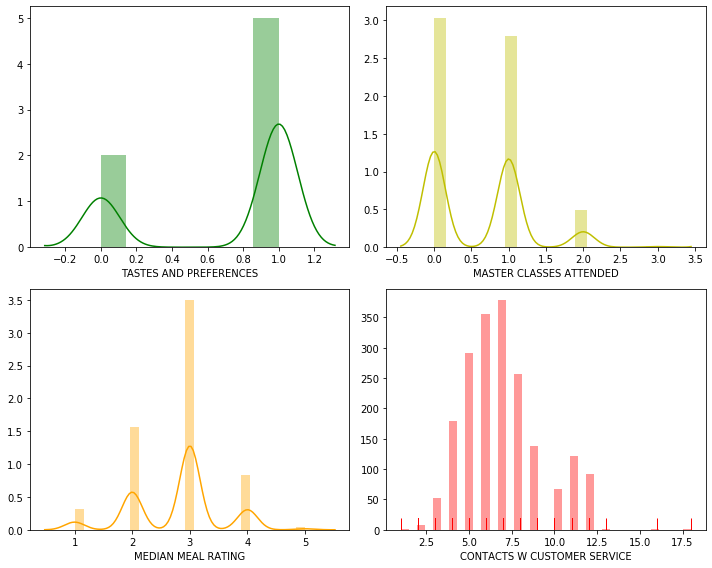

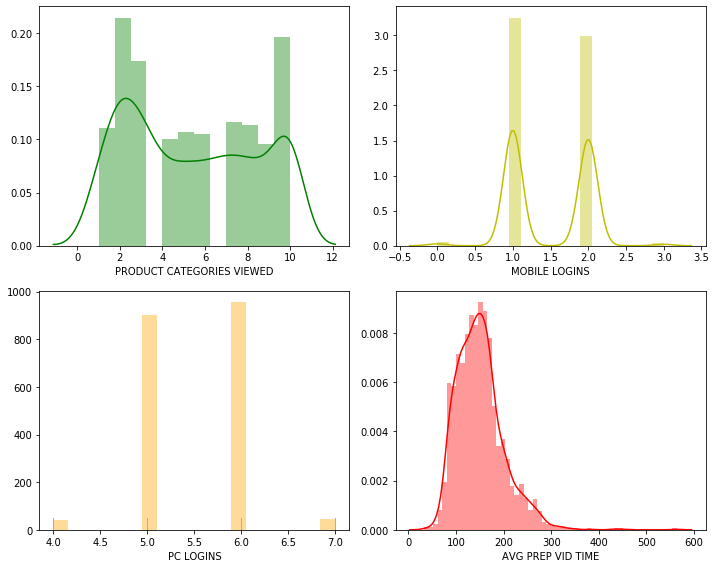

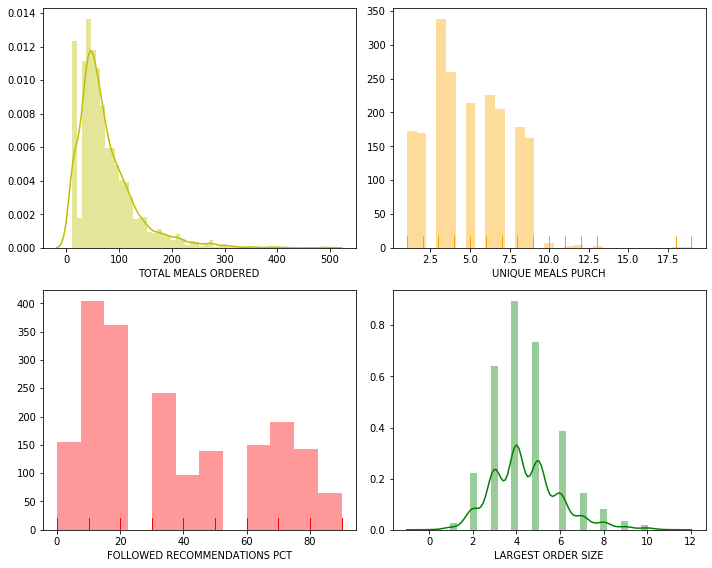

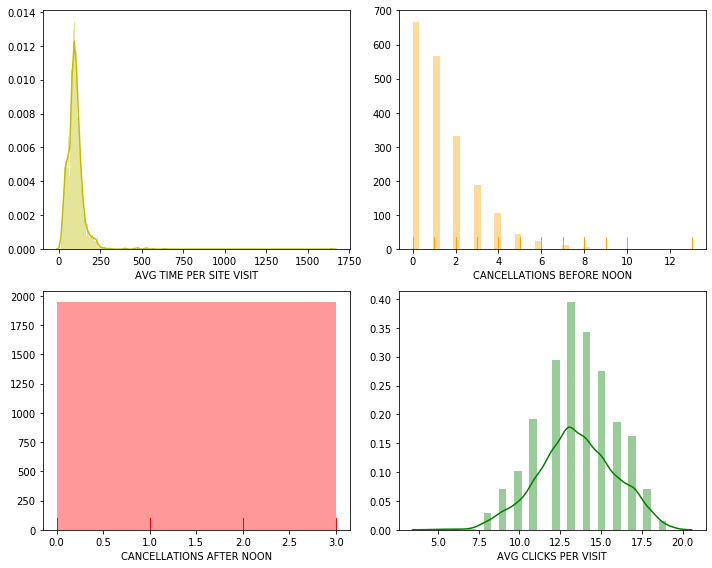

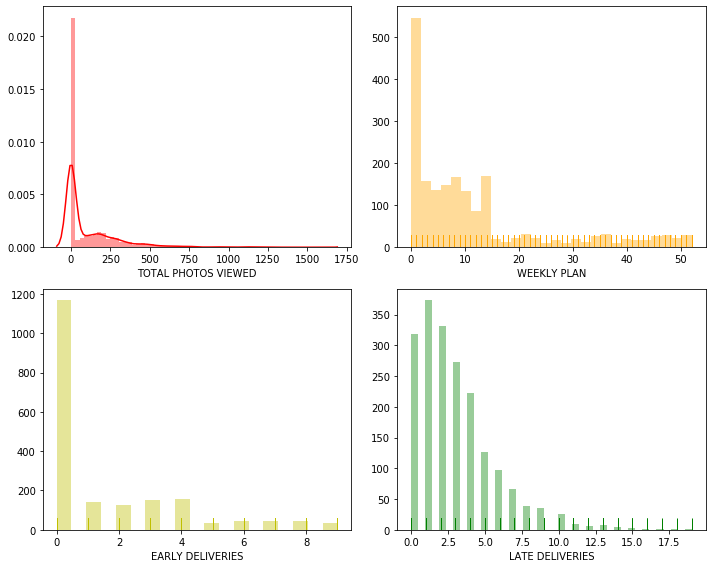

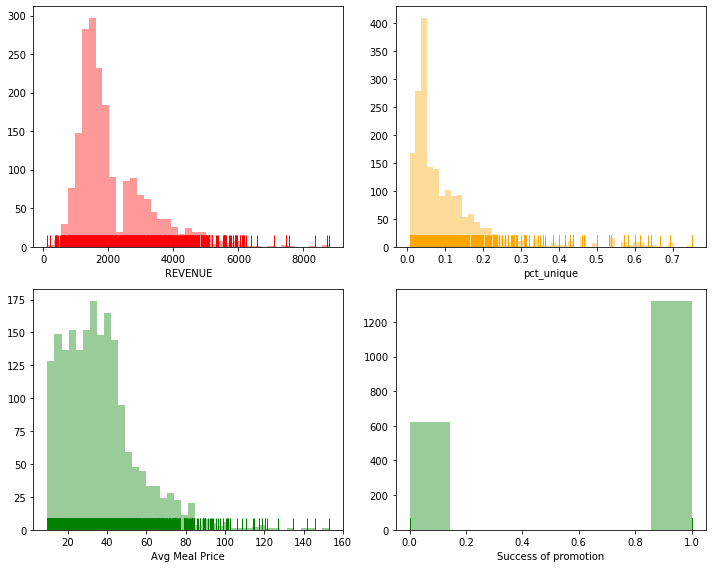

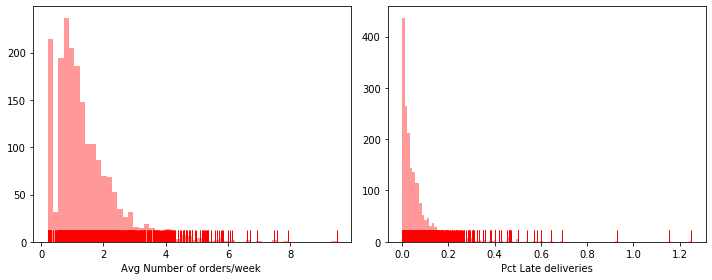

In [15]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TASTES AND PREFERENCES')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MASTER CLASSES ATTENDED')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('MEDIAN MEAL RATING')

########################
plt.subplot(2, 2, 4)
sns.distplot(apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS W CUSTOMER SERVICE')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 1 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT CATEGORIES VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MOBILE LOGINS')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('PC LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(apprentice['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('AVG PREP VID TIME')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 2 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL MEALS ORDERED')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE MEALS PURCH')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED RECOMMENDATIONS PCT')

########################

plt.subplot(2, 2, 4)
sns.distplot(apprentice['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST ORDER SIZE')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 3 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG TIME PER SITE VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['CANCELLATIONS_BEFORE_NOON'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS BEFORE NOON')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['CANCELLATIONS_AFTER_NOON'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('CANCELLATIONS AFTER NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(apprentice['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG CLICKS PER VISIT')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 4 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             #kde   = False,
             #rug   = True,
             color = 'r')
plt.xlabel('TOTAL PHOTOS VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['WEEKLY_PLAN'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('WEEKLY PLAN')

########################
           
plt.subplot(2, 2, 3)
sns.distplot(apprentice['EARLY_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('EARLY DELIVERIES')

plt.subplot(2, 2, 4)
sns.distplot(apprentice['LATE_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('LATE DELIVERIES')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 5 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['REVENUE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['pct_unique'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('pct_unique')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['avg_meal_price'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('Avg Meal Price')

########################

plt.subplot(2, 2, 4)
sns.distplot(apprentice['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('Success of promotion')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 6 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.distplot(apprentice['avg_week_order'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Avg Number of orders/week ')

########################

plt.subplot(1, 2, 2)
sns.distplot(apprentice['pct_late'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Pct Late deliveries')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 7 of 7.png')
plt.show()


***
<br>
Based on the distribution, outlier variables are going to be created for the following columns. <br> <br>
The percentage of success of the promotion is higher than the percentage of failure. For the 'FOLLOWED_RECOMMENDATIONS_PCT' colum, three sets of variables will be created to show case the three different groups observed (0-30, 30-60, 60-100).
<br>
As of the rest of variables, the tresholds are going to be defined to remove outliers.

In [16]:
# Defining the outliers for the variables

Followed_recommendations20_hi  = 30

Followed_recommendations50_lo  = 30
Followed_recommendations50_hi  = 60

Followed_recommendations90_lo  = 60
Followed_recommendations90_hi  = 100

Median_Meal_Rating_lo          = 2 
Median_Meal_Rating_hi          = 4

avg_meal_price_hi              = 70

avg_week_order_hi              = 4

pct_late_hi                    = 0.15

Masters_classes_attended_hi    = 2

Contacts_W_customer_service_lo = 5.0 
Contacts_W_customer_service_hi = 10

Avg_Prep_Vid_Time_lo           = 60 
Avg_Prep_Vid_Time_hi           = 220

Total_Meals_Ordered_hi         = 230

Weekly_Plan_hi                 = 15

Unique_Meals_Purch_hi          = 3

Late_Deliveries_hi             = 6

Early_Deliveries_hi            = 0

Largest_Order_size_lo          = 2
Largest_Order_size_hi          = 10

Avg_Time_Per_Site_Visit_hi     = 250

Cancellations_Before_Noon_hi   = 4

Avg_Clicks_Per_Visit_lo        = 12
Avg_Clicks_Per_Visit_hi        = 16

Total_Photos_Viewed_hi         = 280

Mobile_Logins_lo               = 5
Mobile_Logins_hi               = 6

Pc_Logins_lo                   = 5
Pc_Logins_hi                   = 6

pct_unique_hi                  = 0.25

Revenue_hi                     = 3050


##############################################
## Feature Engineering (outlier thresholds) ##
##############################################

# developing features (columns) for outliers

# Followed recommendations pct < 30
apprentice['out_recomm_30'] = 0
condition_hi = apprentice.loc[0:,'out_recomm_30'][apprentice['FOLLOWED_RECOMMENDATIONS_PCT'] > Followed_recommendations20_hi]

apprentice['out_recomm_30'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# Followed recommendations pct between 31 and 60
apprentice['out_recomm_50'] = 0
condition_hi = apprentice.loc[0:,'out_recomm_50'][apprentice['FOLLOWED_RECOMMENDATIONS_PCT'] > Followed_recommendations50_hi]
condition_lo = apprentice.loc[0:,'out_recomm_50'][apprentice['FOLLOWED_RECOMMENDATIONS_PCT'] < Followed_recommendations50_lo]

apprentice['out_recomm_50'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice['out_recomm_50'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Followed recommendations pct between 61 and 100
apprentice['out_recomm_90'] = 0
condition_hi = apprentice.loc[0:,'out_recomm_90'][apprentice['FOLLOWED_RECOMMENDATIONS_PCT'] > Followed_recommendations90_hi]
condition_lo = apprentice.loc[0:,'out_recomm_90'][apprentice['FOLLOWED_RECOMMENDATIONS_PCT'] < Followed_recommendations90_lo]

apprentice['out_recomm_90'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice['out_recomm_90'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Pct late deliveries
apprentice['out_pct_late'] = 0
condition_hi = apprentice.loc[0:,'out_pct_late'][apprentice['pct_late'] > pct_late_hi]

apprentice['out_pct_late'].replace(to_replace = condition_hi,
                                   value      = 1,
                                   inplace    = True)


# Avg meal price
apprentice['out_avg_meal_price'] = 0
condition_hi = apprentice.loc[0:,'out_avg_meal_price'][apprentice['avg_meal_price'] > avg_meal_price_hi]

apprentice['out_avg_meal_price'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)

# Avg Week order
apprentice['out_avg_week_order'] = 0
condition_hi = apprentice.loc[0:,'out_avg_week_order'][apprentice['avg_week_order'] > avg_week_order_hi]

apprentice['out_avg_week_order'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)


# Masters Classes Attended
apprentice['out_Masters_Classes_Attended'] = 0
condition_hi = apprentice.loc[0:,'out_Masters_Classes_Attended'][apprentice['MASTER_CLASSES_ATTENDED'] > Masters_classes_attended_hi]

apprentice['out_Masters_Classes_Attended'].replace(to_replace = condition_hi,
                                                   value      = 1,
                                                   inplace    = True)

# Median Meal Rating
apprentice['out_Median_Meal_Rating'] = 0
condition_hi = apprentice.loc[0:,'out_Median_Meal_Rating'][apprentice['MEDIAN_MEAL_RATING'] > Median_Meal_Rating_hi]
condition_lo = apprentice.loc[0:,'out_Median_Meal_Rating'][apprentice['MEDIAN_MEAL_RATING'] < Median_Meal_Rating_lo]

apprentice['out_Median_Meal_Rating'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

apprentice['out_Median_Meal_Rating'].replace(to_replace = condition_lo,
                                             value      = 1,
                                             inplace    = True)


# Contacts W Customer Service
apprentice['out_Customers_W_Customer_service'] = 0
condition_hi = apprentice.loc[0:,'out_Customers_W_Customer_service'][apprentice['CONTACTS_W_CUSTOMER_SERVICE'] > Contacts_W_customer_service_hi]
condition_lo = apprentice.loc[0:,'out_Customers_W_Customer_service'][apprentice['CONTACTS_W_CUSTOMER_SERVICE'] < Contacts_W_customer_service_lo]

apprentice['out_Customers_W_Customer_service'].replace(to_replace = condition_hi,
                                                       value      = 1,
                                                       inplace    = True)

apprentice['out_Customers_W_Customer_service'].replace(to_replace = condition_lo,
                                                       value      = 1,
                                                       inplace    = True)

# Avg Prep Vid Time
apprentice['out_Avg_Prep_Vid_Time'] = 0
condition_hi = apprentice.loc[0:,'out_Avg_Prep_Vid_Time'][apprentice['AVG_PREP_VID_TIME'] > Avg_Prep_Vid_Time_hi]
condition_lo = apprentice.loc[0:,'out_Avg_Prep_Vid_Time'][apprentice['AVG_PREP_VID_TIME'] < Avg_Prep_Vid_Time_lo]

apprentice['out_Avg_Prep_Vid_Time'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

apprentice['out_Avg_Prep_Vid_Time'].replace(to_replace = condition_lo,
                                            value      = 1,
                                            inplace    = True)

# Total Meals Ordered
apprentice['out_Total_Meals_Ordered'] = 0
condition_hi = apprentice.loc[0:,'out_Total_Meals_Ordered'][apprentice['TOTAL_MEALS_ORDERED'] > Total_Meals_Ordered_hi]

apprentice['out_Total_Meals_Ordered'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

# Weekly Plan
apprentice['out_Weekly_Plan'] = 0
condition_hi = apprentice.loc[0:,'out_Weekly_Plan'][apprentice['WEEKLY_PLAN'] > Weekly_Plan_hi]

apprentice['out_Weekly_Plan'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

# Unique Meals Purch
apprentice['out_Unique_Meals_Purch'] = 0
condition_hi = apprentice.loc[0:,'out_Unique_Meals_Purch'][apprentice['UNIQUE_MEALS_PURCH'] > Unique_Meals_Purch_hi]

apprentice['out_Unique_Meals_Purch'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

# Late Deliveries
apprentice['out_Late_Deliveries'] = 0
condition_hi = apprentice.loc[0:,'out_Late_Deliveries'][apprentice['LATE_DELIVERIES'] > Late_Deliveries_hi]

apprentice['out_Late_Deliveries'].replace(to_replace = condition_hi,
                                          value      = 1,
                                          inplace    = True)

# Early Deliveries
apprentice['out_Early_Deliveries'] = 0
condition_hi = apprentice.loc[0:,'out_Early_Deliveries'][apprentice['EARLY_DELIVERIES'] > Early_Deliveries_hi]

apprentice['out_Early_Deliveries'].replace(to_replace = condition_hi,
                                           value      = 1,
                                           inplace    = True)

# Largest Order Size
apprentice['out_Largest_Order_Size'] = 0
condition_hi = apprentice.loc[0:,'out_Largest_Order_Size'][apprentice['LARGEST_ORDER_SIZE'] > Largest_Order_size_hi]
condition_lo = apprentice.loc[0:,'out_Largest_Order_Size'][apprentice['LARGEST_ORDER_SIZE'] < Largest_Order_size_lo]

apprentice['out_Largest_Order_Size'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

# Avg Time Per Site Visit
apprentice['out_Avg_Time_Per_Site_Visit'] = 0
condition_hi = apprentice.loc[0:,'out_Avg_Time_Per_Site_Visit'][apprentice['AVG_TIME_PER_SITE_VISIT'] > Avg_Time_Per_Site_Visit_hi]

apprentice['out_Avg_Time_Per_Site_Visit'].replace(to_replace = condition_hi,
                                                  value      = 1,
                                                  inplace    = True)

# Cancellations Before Noon
apprentice['out_Cancellations_Before_Noon'] = 0
condition_hi = apprentice.loc[0:,'out_Cancellations_Before_Noon'][apprentice['CANCELLATIONS_BEFORE_NOON'] > Cancellations_Before_Noon_hi]

apprentice['out_Cancellations_Before_Noon'].replace(to_replace = condition_hi,
                                                    value      = 1,
                                                    inplace    = True)

# Avg Clicks Per Visit
apprentice['out_Avg_Clicks_Per_Visit'] = 0
condition_hi = apprentice.loc[0:,'out_Avg_Clicks_Per_Visit'][apprentice['AVG_CLICKS_PER_VISIT'] > Avg_Clicks_Per_Visit_hi]
condition_lo = apprentice.loc[0:,'out_Avg_Clicks_Per_Visit'][apprentice['AVG_CLICKS_PER_VISIT'] < Avg_Clicks_Per_Visit_lo]

apprentice['out_Avg_Clicks_Per_Visit'].replace(to_replace = condition_hi,
                                               value      = 1,
                                               inplace    = True)

apprentice['out_Avg_Clicks_Per_Visit'].replace(to_replace = condition_lo,
                                               value      = 1,
                                               inplace    = True)

# Total Photos Viewed
apprentice['out_Total_Photos_Viewed'] = 0
condition_hi = apprentice.loc[0:,'out_Total_Photos_Viewed'][apprentice['TOTAL_PHOTOS_VIEWED'] > Total_Photos_Viewed_hi]

apprentice['out_Total_Photos_Viewed'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

# PC Logins
apprentice['out_Pc_Logins'] = 0
condition_hi = apprentice.loc[0:,'out_Pc_Logins'][apprentice['PC_LOGINS'] > Pc_Logins_hi]
condition_lo = apprentice.loc[0:,'out_Pc_Logins'][apprentice['PC_LOGINS'] < Pc_Logins_lo]

apprentice['out_Pc_Logins'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice['out_Pc_Logins'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Mobile Logins
apprentice['out_Mobile_Logins'] = 0
condition_hi = apprentice.loc[0:,'out_Mobile_Logins'][apprentice['MOBILE_LOGINS'] > Mobile_Logins_hi]
condition_lo = apprentice.loc[0:,'out_Mobile_Logins'][apprentice['MOBILE_LOGINS'] < Mobile_Logins_lo]

apprentice['out_Mobile_Logins'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

apprentice['out_Mobile_Logins'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)

# Percentage of Unique Meals Purch
apprentice['out_pct_unique'] = 0
condition_hi = apprentice.loc[0:,'out_pct_unique'][apprentice['pct_unique'] > pct_unique_hi]

apprentice['out_pct_unique'].replace(to_replace = condition_hi,
                                     value      = 1,
                                     inplace    = True)

# Revenue
apprentice['out_Revenue'] = 0
condition_hi = apprentice.loc[0:,'out_Revenue'][apprentice['REVENUE'] > Revenue_hi]

apprentice['out_Revenue'].replace(to_replace = condition_hi, 
                                  value      = 1, 
                                  inplace    = True)

***
The following graphes are plotting the boxplot of each column and the response 'CROSS_SELL_SUCCESS'.

The following treshlods points have been developed based in the scatterplots previously displayed.

***
<br>
<h4> Encoding Categorical Data </h4>


Base on our previous analysis (the quantile table), 'MEDIAN_MEAL_RATING' is not going to be considered as categorical but discrete. The only categorical variable in the dataset is domain. 

***
<br>
Let's plot a boxplot of 'EMAIL_DOMAIN' to observe its variation.

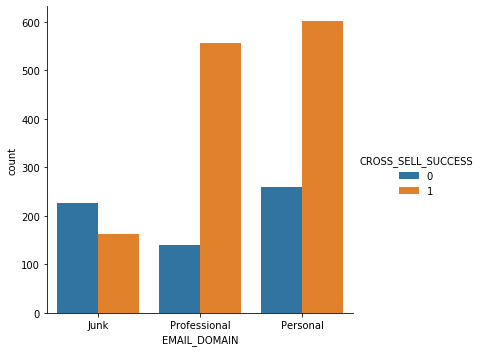

In [17]:
sns.catplot(x    = "EMAIL_DOMAIN",  
            hue  = "CROSS_SELL_SUCCESS", 
            kind = "count",
            data = apprentice
            #data=apprentice.query("FOLLOWED_RECOMMENDATIONS_PCT < 30")
           )

plt.show()


***
The previous graphes show the distribution of the column 'EMAIL_DOMAIN' among the promotion success. For people registered with a professional email, there is a high percentage of success of the promotion. Moreover, the trend is the same for the ones registered with a personal email, but the percentage of success is relatively lower.

***
<br>
Encode 'EMAIL_DOMAIN' to get dummies.

In [18]:
# one hot encoding 'EMAIL_DOMAIN'
one_hot_Domain = pd.get_dummies(apprentice['EMAIL_DOMAIN'])

# dropping 'EMAIL_DOMAIN' after it has been encoded
apprentice = apprentice.drop(['EMAIL_DOMAIN'], axis = 1)

# joining codings together
apprentice = apprentice.join([one_hot_Domain])

# drop one of the dummies ('Junk') for a better prediction.
apprentice = apprentice.drop(['EMAIL','Junk'], axis = 1)


***
<br>
Save the results.

In [19]:
# saving results
apprentice.to_excel('apprentice_feature_rich.xlsx',
                 index = False)

<h3> Part IV - Buiding a Predictive Model </h3>

***
<br> Data Dumping. Develop a correlation matrix to get the columns correlated to 'REVENUE' column. It helps us to get a sense of what might be the strongest explanatory variables.

In [20]:
# creating a (Pearson) correlation matrix
df_corr = apprentice.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                  1.00
out_recomm_30                       0.56
FOLLOWED_RECOMMENDATIONS_PCT        0.46
Professional                        0.19
CANCELLATIONS_BEFORE_NOON           0.16
MOBILE_NUMBER                       0.10
TASTES_AND_PREFERENCES              0.08
REFRIGERATED_LOCKER                 0.07
out_Cancellations_Before_Noon       0.06
MASTER_CLASSES_ATTENDED             0.04
PACKAGE_LOCKER                      0.04
PC_LOGINS                           0.04
CONTACTS_W_CUSTOMER_SERVICE         0.04
Personal                            0.04
AVG_PREP_VID_TIME                   0.03
MEDIAN_MEAL_RATING                  0.03
out_Largest_Order_Size              0.02
EARLY_DELIVERIES                    0.02
LARGEST_ORDER_SIZE                  0.02
AVG_TIME_PER_SITE_VISIT             0.01
LATE_DELIVERIES                     0.01
TOTAL_MEALS_ORDERED                 0.01
out_Revenue                         0.01
avg_week_order                      0.01
TOTAL_PHOTOS_VIE

***
<br>
From this table, we can see that the columns that are positively 'strong' (and medium) correlated to Revenue are: <strong> out_recomm_30 for the group of people following meals recommendations between 0 and 30%, Followed recommendations pct (the total column) </strong>.
<br>
On the other hand, the columns with negative 'strong' (and medium) correlated are: <strong> out_recomm_90 for the group of people following meals recommendations between 60 and 100% </strong>.

***
<br>

Prepare the explanatory variable data by dropping 'REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME' from the dataset (save as apprentice_data). <br><br>
Prepare the response variable data by subsetting 'REVENUE' (save as apprentice_target).<br><br>
Create training and testing sets with function train_test_split()

In [21]:
# dropping Cross sell success, Name and Revenue from the explanatory variable set
apprentice_explanatory = apprentice.drop(['NAME','FIRST_NAME', 'FAMILY_NAME'], 
                                         axis=1)

# declaring explanatory variables
apprentice_data = apprentice_explanatory.drop(['CROSS_SELL_SUCCESS'], 
                                               axis = 1)


# declaring response variable
apprentice_target = apprentice.loc[ : ,'CROSS_SELL_SUCCESS']

# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(apprentice_data,
                                                    apprentice_target,
                                                    test_size = 0.25,
                                                    random_state = 222,
                                                    stratify = apprentice_target)


# merging training data for statsmodels
apprentice_train = pd.concat([X_train, y_train], axis = 1)

***
Let's throw everything into a model and see how each explanatory variable performs. This is known as building a full model. <br>

In [22]:
#Building a model

# instantiating a logistic regression model object
logistic_full = smf.logit(formula   = """ CROSS_SELL_SUCCESS ~
                                                REVENUE +
                                                TOTAL_MEALS_ORDERED +
                                                UNIQUE_MEALS_PURCH +
                                                CONTACTS_W_CUSTOMER_SERVICE +
                                                PRODUCT_CATEGORIES_VIEWED +
                                                AVG_TIME_PER_SITE_VISIT +
                                                MOBILE_NUMBER +
                                                CANCELLATIONS_BEFORE_NOON +
                                                CANCELLATIONS_AFTER_NOON +
                                                TASTES_AND_PREFERENCES +
                                                PC_LOGINS +
                                                MOBILE_LOGINS +
                                                WEEKLY_PLAN +
                                                EARLY_DELIVERIES +
                                                LATE_DELIVERIES +
                                                PACKAGE_LOCKER +
                                                REFRIGERATED_LOCKER +
                                                FOLLOWED_RECOMMENDATIONS_PCT +
                                                AVG_PREP_VID_TIME +
                                                LARGEST_ORDER_SIZE +
                                                MASTER_CLASSES_ATTENDED +
                                                MEDIAN_MEAL_RATING +
                                                AVG_CLICKS_PER_VISIT +
                                                TOTAL_PHOTOS_VIEWED +
                                                pct_late +
                                                pct_unique +
                                                avg_meal_price +
                                                avg_week_order +
                                                out_pct_late +
                                                out_avg_meal_price +
                                                out_avg_week_order +
                                                out_Masters_Classes_Attended +
                                                out_Median_Meal_Rating +
                                                out_Customers_W_Customer_service +
                                                out_Avg_Prep_Vid_Time +
                                                out_Total_Meals_Ordered +
                                                out_Weekly_Plan +
                                                out_Unique_Meals_Purch +
                                                out_Late_Deliveries +
                                                out_Early_Deliveries +
                                                out_Largest_Order_Size +
                                                out_Avg_Time_Per_Site_Visit +
                                                out_Cancellations_Before_Noon +
                                                out_Avg_Clicks_Per_Visit +
                                                out_Total_Photos_Viewed +
                                                out_Pc_Logins +
                                                out_Mobile_Logins +
                                                out_pct_unique +
                                                out_Revenue +
                                                Personal +
                                                Professional +
                                                out_recomm_30 +
                                                out_recomm_50 +
                                                out_recomm_90 """,
                          
                                                           data = apprentice_train)

# FITTING the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

         Current function value: 0.343165
         Iterations: 35


/Users/estelle_eteki/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/estelle_eteki/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/estelle_eteki/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/Users/estelle_eteki/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/estelle_eteki/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/estelle_eteki/opt/anacon

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1405
Method:                           MLE   Df Model:                           53
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.4535
Time:                        19:01:00   Log-Likelihood:                -500.68
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                2.814e-140
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2712   3.78e+18   7.18e-20      1.000    -7.4e+18     7.4e+18
REVENUE                             -0.0003      0.000     -1.156      0.248      -0.001       0.000
TOTAL_MEALS_ORDERED                  3.3423      5.384      0.621      0.535      -7.210      13.895
UNIQUE_MEALS_PURCH                   0.1978      0.066      3.016      0.003       0.069       0.326
CONTACTS_W_CUSTOMER_SERVICE          0.0125      0.052      0.242      0.809      -0.089       0.114
PRODUCT_CATEGORIES_VIEWED           -0.0087      0.026     -0.335      0.738      -0.060       0.042
AVG_TIME_PER_SITE_VISIT              0.0028      0.002      1.404      0.160      -0.001       0.007
MOBILE_NUMBER                        0.8801      0.247      3.563      0.000       0.396       1.364
CANCELLATIONS_BEFORE_NOON            0.3207      0.069      4.666      0.000       0.186       0.455
CANCELLATIONS_AFTER_NOON            -0.2894      0.180     -1.608      0.108      -0.642       0.063
TASTES_AND_PREFERENCES               0.3271      0.172      1.897      0.058      -0.011       0.665
PC_LOGINS                            0.1327      0.130      1.018      0.309      -0.123       0.388
MOBILE_LOGINS                       -0.2599      0.155     -1.677      0.094      -0.564       0.044
WEEKLY_PLAN                         -0.0213      0.012     -1.786      0.074      -0.045       0.002
EARLY_DELIVERIES                     0.0972      0.055      1.759      0.079      -0.011       0.205
LATE_DELIVERIES                     -0.0109      0.055     -0.196      0.844      -0.119       0.098
PACKAGE_LOCKER                       0.0204      0.184      0.111      0.912      -0.340       0.381
REFRIGERATED_LOCKER                  0.1122      0.293      0.383      0.701      -0.461       0.686
FOLLOWED_RECOMMENDATIONS_PCT        -0.0333        nan        nan        nan         nan         nan
AVG_PREP_VID_TIME                    0.0008      0.004      0.202      0.840      -0.007       0.008
LARGEST_ORDER_SIZE                   0.0249      0.089      0.281      0.779      -0.149       0.199
MASTER_CLASSES_ATTENDED              0.2120      0.145      1.460      0.144      -0.073       0.496
MEDIAN_MEAL_RATING                  -0.0044      0.252     -0.018      0.986      -0.498       0.489
AVG_CLICKS_PER_VISIT                -0.0770      0.069     -1.118      0.263      -0.212       0.058
TOTAL_PHOTOS_VIEWED                  0.0003      0.001      0.407      0.684      -0.001       0.002
pct_late                             3.9105      1.962      1.993      0.046       0.065       7.756
pct_unique                          -6.3770      2.200     -2.898      0.004     -10.689      -2.065
avg_meal_price                       0.0087      0.012      0.743      0.458      -0.014       0.031
avg_week_order                    -173.7156    282.332     -0.615      0.538    -727.075     379.644
out_pct_l

***
<br>
This model present some exploratory variables that are not significant (p-value > 0.05). We will now diminish variable one by one to obtain a model with only significant explanatory variables.

In [23]:
#Building a model

# instantiating a logistic regression model object
logistic_sig = smf.logit(formula   = """ CROSS_SELL_SUCCESS ~
                                                UNIQUE_MEALS_PURCH +
                                                MOBILE_NUMBER +
                                                CANCELLATIONS_BEFORE_NOON +
                                                TASTES_AND_PREFERENCES +
                                                MOBILE_LOGINS +
                                                FOLLOWED_RECOMMENDATIONS_PCT +
                                                pct_unique +
                                                out_Cancellations_Before_Noon +
                                                Personal +
                                                Professional  """,
                          
                                                           data = apprentice_train)


# FITTING the model object
results_sig = logistic_sig.fit()


# checking the results SUMMARY
results_sig.summary()

Optimization terminated successfully.
         Current function value: 0.436527
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                           10
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3048
Time:                        19:01:00   Log-Likelihood:                -636.89
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                1.293e-113
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.9864      0.381     -7.839      0.000      -3.733      -2.240
UNIQUE_MEALS_PURCH                0.0588      0.031      1.884      0.060      -0.002       0.120
MOBILE_NUMBER                     0.7339      0.203      3.609      0.000       0.335       1.132
CANCELLATIONS_BEFORE_NOON         0.3099      0.062      5.034      0.000       0.189       0.431
TASTES_AND_PREFERENCES            0.3314      0.151      2.200      0.028       0.036       0.627
MOBILE_LOGINS                    -0.2886      0.130     -2.220      0.026      -0.543      -0.034
FOLLOWED_RECOMMENDATIONS_PCT      0.0584      0.004     14.507      0.000       0.051       0.066
pct_unique                       -1.4880      0.656     -2.268      0.023      -2.774      -0.202
out_Cancellations_Before_Noon    -0.9391      0.472     -1.990      0.047      -1.864      -0.014
Personal                          1.2319      0.178      6.920      0.000       0.883       1.581
Professional                      1.8967      0.195      9.722      0.000       1.514       2.279
=================================================================================================
"""

***
From the previous analysis, the significant variables are: <strong> UNIQUE_MEALS_PURCH, MOBILE_NUMBER, CANCELLATIONS_BEFORE_NOON, TASTES_AND_PREFERENCES, MOBILE_LOGINS, FOLLOWED_RECOMMENDATIONS_PCT, pct_unique, out_Cancellations_Before_Noon, Personal and Professional. </strong> <br>
<br>
We will now create a dictionary to store significant variables only.<br>
It will help us to provide for each model a prediction with the full dataset and with the significant variables.

In [24]:
# creating a dictionary to store candidate models

variables_dict = {
    
 # significant variables only
 'logit_sig'    : [ 'UNIQUE_MEALS_PURCH','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
                   'TASTES_AND_PREFERENCES','MOBILE_LOGINS','FOLLOWED_RECOMMENDATIONS_PCT',
                   'pct_unique','out_Cancellations_Before_Noon','Personal','Professional']
}

<h4> Logistic Regression </h4>


***
<br>
We are going to perform our prediction using the logistic regression model and the full dataset. <br>
* INSTANTIATE a LogisticRegression() object,<br>
* FIT the training data to the model object,<br>
* PREDICT using the testing data,<br>
* SCORE your results.

In [25]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver       = 'lbfgs',
                            C            = 2.7,
                            max_iter     = 10000,
                            warm_start   = True,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


Training ACCURACY: 0.814
Testing  ACCURACY: 0.786


0.765

***
Creating a <strong> model performance list </strong> to store our results and evaluate our model. <br>
Append the results to the list.

In [26]:
#Initialiazing model performance
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]

# declaring model performance objects
logreg_train_acc = logreg_fit.score(X_train, y_train).round(3)
logreg_test_acc  = logreg_fit.score(X_test, y_test).round(3)
logreg_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(3)


# appending to model_performance
model_performance.append(['Full Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


<h5> With Significant Variables </h5>


We are going to run the Logistic Regression with our explanatory variables made of only <strong> significant variables </strong>

In [27]:
# declaring explanatory variables
apprentice_data = apprentice.loc[ : ,variables_dict['logit_sig']]


# declaring response variable
apprentice_target = apprentice.loc[ : ,'CROSS_SELL_SUCCESS']

# train-test split with stratification
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(apprentice_data,
                                                                    apprentice_target,
                                                                    test_size = 0.25,
                                                                    random_state = 222,
                                                                    stratify = apprentice_target)

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver       = 'lbfgs',
                            C            = 2.7,
                            max_iter     = 10000,
                            warm_start   = True,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train_sig, y_train_sig)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test_sig)


Training ACCURACY: 0.7683
Testing  ACCURACY: 0.7392


0.7031

***
Append the results to our <strong> model performance list </strong>.

In [28]:
# declaring model performance objects
logreg_train_acc = logreg_fit.score(X_train_sig, y_train_sig).round(3)
logreg_test_acc  = logreg_fit.score(X_test_sig, y_test_sig).round(3)
logreg_auc       = roc_auc_score(y_true  = y_test_sig,
                                 y_score = logreg_pred).round(3)


# appending to model_performance
model_performance.append(['Sig Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


***
***
<h4> Decision Tree Classifier </h4>


***
<br>
We are going to perform our prediction using the Decision Tree Classifier model and the full dataset. <br>
* INSTANTIATE a DecisionTreeClassifier() object,<br>
* FIT the training data to the model object,<br>
* PREDICT using the testing data,<br>
* SCORE your results.

In [29]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier(criterion        = 'gini',
                                   splitter         = 'best',
                                   min_samples_leaf = 1,
                                   max_depth        = 1,
                                   random_state     = 222)


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


Training ACCURACY: 0.7265
Testing  ACCURACY: 0.7166
AUC Score        : 0.7915


***
Append the results to our <strong> model performance list </strong>.

In [30]:
# declaring model performance objects
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(3)
full_tree_test_acc  = full_tree_fit.score(X_test, y_test).round(3)
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(3)


# appending to model_performance
model_performance.append(['Full Tree Classifier',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


<h5> With Significant Variables </h5>

We are going to run the Decision Tree Classifier with our explanatory variables made of only <strong> significant variables </strong>

In [31]:
# train-test split with stratification
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(apprentice_data,
                                                                    apprentice_target,
                                                                    test_size    = 0.25,
                                                                    random_state = 222,
                                                                    stratify     = apprentice_target)

# INSTANTIATING a classification tree object
sig_tree = DecisionTreeClassifier(criterion        = 'gini',
                                  splitter         = 'best',
                                  min_samples_leaf = 1,
                                  max_depth        = 1,
                                  random_state     = 222)


# FITTING the training data
sig_tree_fit = sig_tree.fit(X_train_sig, y_train_sig)


# PREDICTING on new data
sig_tree_pred = sig_tree_fit.predict(X_test_sig)


Training ACCURACY: 0.7265
Testing  ACCURACY: 0.7166
AUC Score        : 0.7915


***
Append the results to our <strong> model performance list </strong>.

In [32]:
# declaring model performance objects
sig_tree_train_acc = sig_tree_fit.score(X_train_sig, y_train_sig).round(3)
sig_tree_test_acc  = sig_tree_fit.score(X_test_sig, y_test_sig).round(3)
sig_tree_auc       = roc_auc_score(y_true  = y_test_sig,
                                    y_score = sig_tree_pred).round(3)


# appending to model_performance
model_performance.append(['Sig Tree Classifier',
                          sig_tree_train_acc,
                          sig_tree_test_acc,
                          sig_tree_auc])


***
We will convert the model performance into a dataFrame and display the output.

In [33]:
# declaring a DataFrame object
model_performance_df = pd.DataFrame(model_performance[1:], columns = model_performance[0])


# saving the DataFrame to Excel
model_performance_df.to_excel('Classification Model Performance.xlsx',
                              index = False)

model_performance_df

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Full Logistic Regression,0.814,0.786,0.765
1,Sig Logistic Regression,0.768,0.739,0.703
2,Full Tree Classifier,0.727,0.717,0.792
3,Sig Tree Classifier,0.727,0.717,0.792


From our model performance table, we observe that no model is overfitting. Furthermore the model with the highest AUC score is <strong> Decision Tree Classifier </strong> with <strong> 0.7915 </strong>. <br>
The decision tree classifier shows the same metrics with either full or significant variables. Hence, for our model, we are going to choose the model with full variables for our model.

<h4> Final Model </h4>

***
Creating a confusion matrix for the selected model.<br>
Full Decision Tree classifier.

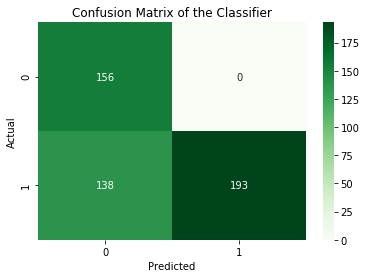

In [41]:
# creating a confusion matrix
cm = confusion_matrix(y_true = y_test,
                       y_pred = full_tree_pred)

#plot the confusion matrix in a heat map
sns.heatmap(cm,
            annot       = True,
            cmap        = 'Greens',
            fmt         = 'g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Classifier')
plt.show()

***
The previous shows us that there is a numerous of people who were predicted failure and they were actually a success. On the other hand, none of them have been predicted as success but were actually failure. <br>
From a business perspective, this scenario is prioritize and better because the company will not expect more than what's predicted. However, they may be surprised on the new successes.

Now, Let's display the tree.

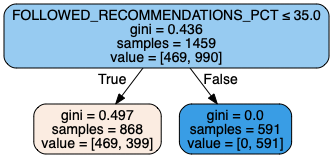

In [44]:
# visualizing the tree
dot_data = StringIO()


# exporting tree to graphviz
export_graphviz(decision_tree      = full_tree_fit,
                out_file           = dot_data,
                filled             = True,
                rounded            = True,
                special_characters = True,
                feature_names      = X_train.columns)


# declaring a graph object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


# creating image
img = Image(graph.create_png(),
            height = 500,
            width  = 500)

img

From the displayed tree, we observed that our model only take into account FOLLOWED_RECOMMENDATIONS_PCT (how much a consumer followed meals recommendations). If greater than threshold (35% in this case) success, otherwise, failure.<br>

The "False" box shows a gini index null. It means that the model is almost perfect on that side.However, It is interesting to see how the gini index in the "True" box is higher than the first one. It means that there is a possibility to enhance the model from this side by understanding how customers with FOLLOWED_RECOMMENDATIONS_PCT less than 35% behave. <br>

For further analysis, we recommend to dive deeper on customers with FOLLOWED_RECOMMENDATIONS_PCT less than 35% behaviors, or on what makes consumers to reach 35% of FOLLOWED_RECOMMENDATIONS_PCT at least.

***
<strong>
Let's develop a new colum for further analysis. The goal would to predict when a consumer have FOLLOWED_RECOMMENDATIONS_PCT > 40 based on the information provided in the dataset.
</strong>

In [60]:
#Creating a column 
# placeholder for 'avg_week_order' feature
apprentice['followed_binary'] = 0

#fill in based on the value in 'LATE_DELIVERIES' and 'TOTAL_MEALS_ORDERED'
for index, col in apprentice.iterrows():
    if apprentice.loc[index, 'FOLLOWED_RECOMMENDATIONS_PCT'] < 35:
        apprentice.loc[index, 'followed_binary'] = 0
    else :
        apprentice.loc[index, 'followed_binary'] = 1
     
